# Chapter 2 - Training simple machine learning algorithms for classification

This notebook includes code featured in chapter 2, along with my annotations and additional explorations. All text was typed by me because it's hard to learn from copying/pasting.

Key topics:
* Build a perceptron from scratch

## Topic: artificial neuron

### Intuition: perceptron

#### Decision function 

A basic perceptron is a binary classifier that uses the decision function...

$\phi(z) =
\left\{
    \begin{array}{ll}
        1  & \mbox{if } z >= \theta \\
        -1  & \mbox{otherwise}
    \end{array}
\right.$

...to designate an observation $x^i$ as belonging to the positive class '1' or the negative class '-1'. The input $z$ is the dot product of a weight vector  $\mathbf{w}$ and an input vector $\mathbf{x}$. Each value in vector $\mathbf{x}$ represents a specific feature value of the observation $x^i$ and vector $\mathbf{w}$ represents the weights associated with each feature.The equation for $z$ is...

$$z = w_0x_0 + w_1x_1 + ... + w_nx_n = \mathbf{w}^T\mathbf{x}$$

...where $n$ is the number of features associated with $x^i$. If the value of $z$ for a particular observation $x^i$ is greater than or equal to a pre-defined theshold $\theta$, class '1' is predicted, otherwise class '-1' is predicted. 

#### Learning rule

The perceptron 'learns' by updating its weights after each epoch, or iteration. The learning rule updates each of the $n$ weights by...

$$w_j := w_j + \Delta w_j$$

...where $\Delta w_j$ is determined by...

$$\Delta w_j = \eta(y^i - \hat{y}^i)x_j^i$$

In this equation, 
- $w_j$ is the initial weight for the $j$th of $n$ features
- $\eta$ is the learning rate (typically a value between 0.0 and 1.0)
- $y^i$ is the true class label for observation $x^i$
- $\hat{y}^i$ is the class label estimated by the decision function $\phi(z)$
- $x_j^i$ is the value of the $j$th feature for the $i$th observation and acts as a multipicative factor

If $\phi(z)$ returns the correct class label, the weight remains unchanged. If the true class is positive, but the prediction is negative, the weight is pushed in the direction of the positive class by making $x_j^i \times w_j$ more positive by...

$$\Delta w_j = \eta(1 - (-1))x_j^i = \eta(2)x_j^i$$

...and if the true class is negative, but the prediction is positive, the weight is pushed in the direction of the positive class by making $x_j^i \times w_j$ more negative by...

$$\Delta w_j = \eta(-1 - 1)x_j^i = \eta(-2)x_j^i$$




### Code: object-oriented perceptron API

In [1]:
import numpy as np

class Perceptron(object):
    """
    Perceptron classifier written from scratch.
    
    Parameters:
    -eta: learning rate
    -n_iter: number of passes through the training data
    -random_state: seed for random weight initialization
    
    Attributes:
    -w_: weights after fitting
    -errors_: number of misclassifications in each epoch (iter)
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Parameters:
        -X: m x n matrix containing training data. Includes m samples and n features
        
        -y: Vector of target values. Contain m values.
        
        Returns:
        self
         """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0
                             ,scale = 0.01
                             ,size = 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors_ = 0
            for xi, target in zip (X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calc net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

#### Code - explain

```python
def net_input()
```
Returns the dot product of a sample $x^i$ from the training data $\mathbf{X}$ and a weight vector containing weights $w_1$ ... $w_n$. The weight $w_0$ is added on to the dot product.

```python
def predict()
```

Returns 

```python
def fit()
```

Takes in an *m* row by *n* column matrix $\mathbf{X}$ and an *m* value vector $\mathbf{y}$. Initial weights are set to random numbers drawn from a normal distribution with a standard deviation of 0.01. The number of values in the weight vector is equal the number of columns in $\mathbf{X}$ plus 1 (for the bias unit).

The fit method runs for a specified number of iterations. Each iteration begins with 0 errors. Within each iteration, each sample in the training data $\mathbf{X}$ along with its corresponding label in vector $\mathbf{y}$ is evaluated. The weights are adjusted after each training sample is evaluated

In [2]:
# refine label vector
y = df.iloc[0:100, 4].values   # set label vector equal to the first 100 values of the 4th column
y = np.where(y == 'Iris-setosa', -1, 1)   # encode setosa as -1, versicolor as 1

# refine feature matrix
X = df.iloc[0:100, [0, 2]].values   # set feature matrix to first 100 values of sepal length and petall length columns

rgen = np.random.RandomState(1)
w_ = rgen.normal(loc = 0.0
                     ,scale = 0.01
                     ,size = 1 + X.shape[1])

NameError: name 'df' is not defined

In [24]:
print('Full weight vector:'), w_

Full weight vector:


(None, array([ 0.01624345, -0.00611756, -0.00528172]))

In [14]:
w_[1:]

array([-0.00611756, -0.00528172])

In [12]:
w_[0]

0.01624345363663242

In [8]:
X[0]

array([5.1, 1.4])

In [9]:
y[0]

-1

In [19]:
np.dot(X[0], w_[1:]) + w_[0]

-0.022350527991209804

#### Code - execute

In [3]:
import pandas as pd

# import iris dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
       'machine-learning-databases/iris/iris.data',
       header=None)
df[:5]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


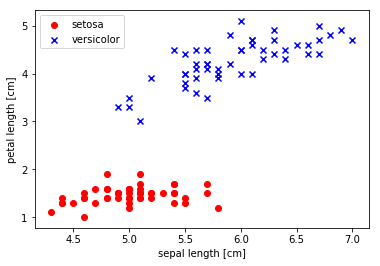

In [34]:
import matplotlib.pyplot as plt

# refine label vector
y = df.iloc[0:100, 4].values   # set label vector equal to the first 100 values of the 4th column
y = np.where(y == 'Iris-setosa', -1, 1)   # encode setosa as -1, versicolor as 1

# refine feature matrix
X = df.iloc[0:100, [0, 2]].values   # set feature matrix to first 100 values of sepal length and petall length columns

# plot
plt.scatter(x = X[:50,0]   # first 50 rows, 0th column
           ,y = X[:50,1]   # first 50 rows, 1st column
           ,color = 'r'
           ,marker = 'o'
           ,label = 'setosa')
plt.scatter(x = X[50:100, 0]
           ,y = X[50:100, 1]
           ,color = 'b'
           ,marker = 'x'
           ,label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(x = range(1, len(ppn.errors_) + 1)
        ,y = ppn.errors_
        ,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_dfecision_regions(X, y, classifier, resolution = 0.02):
    
    # marker generator and colormap
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ('red','blue','lightgreen','gray','cyan')
    
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution)
                          ,np.arange(x1_min, x1_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1
                ,xx2
                ,Z
                ,alpha = 0.3
                ,cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0]
                   ,y = X[y == cl, 1]
                   ,alpha = 0.8
                   ,c = colors[idx]
                   ,marker = markers[idx]
                   ,label = class,edgecolor = 'black')
    

# Side quest - What are classes and why should I use them?

I'll admit that I only have a basic understanding of Classes as I type this. Given that the perceptron API above is object-oriented in approach, I am making a side quest here to educate myself on Class and why I should use them.